In [2]:
#csvファイルを読み込む
import pandas as pd

# ファイルパス（適宜変更してください）
file_path = "global-energy-substitution.csv"

# 読み込み
df = pd.read_csv(file_path)

# 先頭5行を確認
print(df.head())

# データの概要
print(df.info())



  Entity      Code  Year  Other renewables (TWh, substituted energy)  \
0  World  OWID_WRL  1800                                         0.0   
1  World  OWID_WRL  1810                                         0.0   
2  World  OWID_WRL  1820                                         0.0   
3  World  OWID_WRL  1830                                         0.0   
4  World  OWID_WRL  1840                                         0.0   

   Biofuels (TWh, substituted energy)  Solar (TWh, substituted energy)  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   

   Wind (TWh, substituted energy)  Hydropower (TWh, substituted energy)  \
0                             0.0              

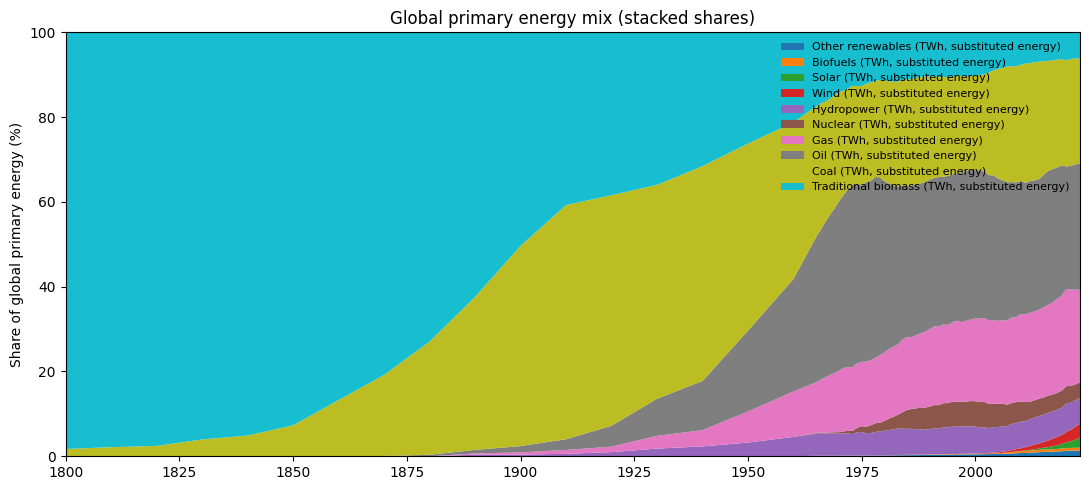

In [4]:
# === Global energy mix stacked area (shares %) ===
# 必要: pandas, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ▼あなたのCSVファイルのパスに変更
csv_path = "global-energy-substitution.csv"

# ---- 1) データ読み込み ----
df = pd.read_csv(csv_path)

# Entity列がある場合、Worldのみに絞る
if "Entity" in df.columns and df["Entity"].dtype == object:
    df = df[df["Entity"].str.lower() == "world"].copy()

# エネルギー列を抽出
energy_cols = [c for c in df.columns if "(TWh" in c or c.endswith("(TWh)")]
if "Year" not in df.columns or not energy_cols:
    raise ValueError("CSVに 'Year' 列と '...(TWh)' 列が必要です。")

# 表示順の調整（存在する列のみ）
preferred_order = [
    "Other renewables (TWh)",
    "Biofuels (TWh)",
    "Solar (TWh)",
    "Wind (TWh)",
    "Hydropower (TWh)",
    "Nuclear (TWh)",
    "Natural gas (TWh)",
    "Oil (TWh)",
    "Coal (TWh)"
]
ordered_cols = [c for c in preferred_order if c in energy_cols] + \
               [c for c in energy_cols if c not in preferred_order]

dfp = df[["Year"] + ordered_cols].sort_values("Year").copy()
for c in ordered_cols:
    dfp[c] = pd.to_numeric(dfp[c], errors="coerce")

# ---- 2) 構成比（%）を計算 ----
total = dfp[ordered_cols].sum(axis=1, skipna=True)
total = total.replace(0, np.nan)
shares = (dfp[ordered_cols].div(total, axis=0) * 100.0).astype(float).fillna(0.0)

# ---- 3) プロット ----
plt.figure(figsize=(11, 5))
plt.stackplot(dfp["Year"].values, shares[ordered_cols].values.T, labels=ordered_cols)
plt.xlim(dfp["Year"].min(), dfp["Year"].max())
plt.ylim(0, 100)
plt.ylabel("Share of global primary energy (%)")
plt.title("Global primary energy mix (stacked shares)")
plt.legend(loc="upper right", ncol=1, fontsize=8, frameon=False)
plt.tight_layout()
plt.show()
